# Basics of Linear Algebra

- Pre-requisites: Mathematical concepts from https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2829/why-learn-it/2/module-2-data-science-exploratory-data-analysis-and-data-visualization


- Agenda: Math ---> Code + Simple concepts

## 1. Vectors and Hyper-planes:

    * Representation
    * Unit vector
    * Angle between 2 vectors
    * Distance from point to plane
    * Half-spaces


### 1.1  Representing a Vector 

In [112]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://i.imgur.com/OR21M2N.png", width = 700)

Question: What data-structure can we use to represent a plane?
    
Ans: Use numpy array to represent the weights, w = np.array([]). A bias b is a float. And weight w and the bias b term together can be represented in form a tuple like (w, b).  

In [2]:
import numpy as np

w = np.array([1.2, 0, 1.1, 0, 1.4, 1.5]) # Normal to the plane (weight coefficients)
b = 1.2 

pi = (w, b) 

print(type(w))
print(w.size)
print("plane:", pi)

pi_0 = (w, 0)
print("plane passing through origin", pi_0)

# NOTE : pi_0 and pi are parallel to each other.

<class 'numpy.ndarray'>
6
plane: (array([1.2, 0. , 1.1, 0. , 1.4, 1.5]), 1.2)
plane passing through origin (array([1.2, 0. , 1.1, 0. , 1.4, 1.5]), 0)


### 1.2 Representing a Unit Vector 

In [4]:
# unit vector: w_hat from w

Image(url= "https://i.imgur.com/w2lNsYq.png", width = 700)

In [10]:
# unit vector: w_hat from w
import math

# Reference: NumPy dot product of vectors" ---> https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
w_norm = math.sqrt(np.dot(w, w)) 
print("L2 norm of vector i.e. magnitude:", w_norm)

# Reference: NumPy norm of vectors" --> https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
print("L2 norm:", np.linalg.norm(w, 2)) 

w_hat = w/w_norm

print("Unit Vector W^:", w_hat)
print("L2 norm of Unit Vector:", np.linalg.norm(w_hat, 2)) 

L2 norm of vector i.e. magnitude: 2.619160170741759
L2 norm: 2.619160170741759
Unit Vector W^: [0.45816213 0.         0.41998195 0.         0.53452248 0.57270266]
L2 norm of Unit Vector: 1.0


### 1.3 Angle between the two vectors 

In [12]:
# Angle between 2 vectors v1 and v2
Image(url = "https://i.imgur.com/zvFu6Du.png", width = 400)

In [21]:
import random 
np.random.seed(100)

# Create an array of the given shape and populate it with random samples from a Uniform distribution over ``[0, 1)``.
v1 = np.random.rand(6)
v2 = np.random.rand(6)

print("v1:", v1)
print("v2:", v2)

# angle_rad = math.acos(np.dot(v1, v2)/(math.sqrt(np.dot(v1, v1)) * math.sqrt(np.dot(v2, v2))))
angle_rad = math.acos(np.dot(v1, v2)/ (np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2)))
print("Angle between the vectors (in rad) =", angle_rad, "in degrees =", angle_rad*360/(2*math.pi))

v1: [0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912]
v2: [0.67074908 0.82585276 0.13670659 0.57509333 0.89132195 0.20920212]
Angle between the vectors (in rad) = 0.826577077988559 in degrees = 47.35937801100033


In [7]:
import math
import random 
np.random.seed(100)

# Create an array of the given shape and populate it with random samples from a Uniform distribution over ``[0, 1)``.
v1 = [int(10*x) for x in np.random.rand(6)] # integers 
v2 = [int(10*y) for y in np.random.rand(6)] # integers

print("v1:", v1)
print("v2:", v2)

# angle_rad = math.acos(np.dot(v1, v2)/(math.sqrt(np.dot(v1, v1)) * math.sqrt(np.dot(v2, v2))))
angle_rad = math.acos(np.dot(v1, v2)/ (np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2)))
print("Angle between the vectors (in rad) =", angle_rad, "in degrees =", angle_rad*360/(2*math.pi))

v1: [5, 2, 4, 8, 0, 1]
v2: [6, 8, 1, 5, 8, 2]
Angle between the vectors (in rad) = 0.8895230938289559 in degrees = 50.9659190558187


Note: Random Vectors play very important role in Locality Sensitive Hashing(LSH) in KNN.  


### 1.4 Distance of a point from a plane 

In [22]:
# Distance from point to a plane.
Image(url= "https://i.imgur.com/SXT6ct1.png", width=500)

In [27]:
# np.linalg.norm([4, 4, 2]) 

6.0

In [24]:
np.random.seed(100)

# declare a plane by the coordinates of it's normal and bias
w = np.random.rand(6)
p = np.random.rand(6)
b = 1.2

# compute the distance of the point from a plane.
# Note that it is nowhere mentioned that normal is unit vector or the plane passes through origin

d = abs(np.dot(w, p) + b)/np.linalg.norm(w) # default is L2 norm
print("The distance of the point from hyperplane =", d)

The distance of the point from hyperplane = 2.0917510432838524


In [49]:
# simple test-cases
import math
np.random.seed(100)

w = np.array([10,0,0,0,0,0]) # magintude 0 or 100 or 1000, it doesn't really matter
b = 0

x = np.array([23,0,0,0,0,0])

d = abs((np.dot(w,x) + b)/np.linalg.norm(w, 2) )
print(d)

23.0


In [50]:
# another test case 

w = np.array([123, 0, 0, 0, 0, 0]) # normal to plane
p = np.array([24, 0, 0, 0, 0, 0]) # location of a point

# Suppose this is a plane passing through x = 1 
# then bias will be -> wTx + b = 0 -> b = - wTx -> b = -123
b = -123

# The answer should be 23. Let's check - 

In [51]:
d = abs(np.dot(w, p) + b)/np.linalg.norm(w) # default is L2 norm
print("The distance of the point from hyperplane =", d)

The distance of the point from hyperplane = 23.0


Sweet! 

### 1.5 To determine if the datapoint lies in positive half-space or negative half-space

In [91]:
import math
np.random.seed(100)

w = np.random.rand(6) # weight coefficients (i.e.normal to the plane)
b = 1.2 # bias 

x = np.random.rand(6) # a random datapoint in the space of the plane

sign =  np.sign((np.dot(w, x) + b)/np.linalg.norm(w, 2)) # note that you can ignore the denominator, it's always positive
print('Positive' if sign == 1 else 'Negative')

Positive


In [60]:
# TESTING the above code
np.random.seed(100)

w = np.random.rand(6)
b = -1.2

# let's consider the point as origin. So, wTx = 0 and the sign will be determined by the bias term.  
x = np.array([0,0,0,0,0,0])

sign =  np.sign((np.dot(w, x) + b) / np.linalg.norm(w))
print('Positive' if sign == 1 else 'Negative')

Negative


It's a good idea to try and implement all of these above snippets as functions to make them reusable.  

## 2. Matrix operations

* Elementwise sum 


* Elementwise product (Haddamard product)


* Matrix multiplication 


* Frobenius norm


* determinant of a matrix


* inverse of a matrix


* covariance matrix of a matrix

In [62]:
import numpy as np
import math
np.random.seed(100)

n = 6 # rows
d = 4 # dimensionality

X1 = np.random.rand(n, d) # n data points of d-dim each
X2 = np.random.rand(n, d) # n data points of d-dim each

w = np.random.rand(d)  # a d-dim vector

print("X1\n", X1)
print(" - "*20)
print("X2\n", X2)
print(" - "*20)

X1
 [[0.54340494 0.27836939 0.42451759 0.84477613]
 [0.00471886 0.12156912 0.67074908 0.82585276]
 [0.13670659 0.57509333 0.89132195 0.20920212]
 [0.18532822 0.10837689 0.21969749 0.97862378]
 [0.81168315 0.17194101 0.81622475 0.27407375]
 [0.43170418 0.94002982 0.81764938 0.33611195]]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
X2
 [[0.17541045 0.37283205 0.00568851 0.25242635]
 [0.79566251 0.01525497 0.59884338 0.60380454]
 [0.10514769 0.38194344 0.03647606 0.89041156]
 [0.98092086 0.05994199 0.89054594 0.5769015 ]
 [0.74247969 0.63018394 0.58184219 0.02043913]
 [0.21002658 0.54468488 0.76911517 0.25069523]]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 


### 2.1 Element-wise sum 

In [63]:
# elementwise sum
print("X1 + X2\n", X1 + X2)

X1 + X2
 [[0.7188154  0.65120143 0.4302061  1.09720249]
 [0.80038136 0.13682409 1.26959246 1.42965729]
 [0.24185428 0.95703677 0.92779801 1.09961369]
 [1.16624908 0.16831888 1.11024344 1.55552528]
 [1.55416284 0.80212495 1.39806694 0.29451288]
 [0.64173076 1.4847147  1.58676455 0.58680718]]


### 2.2 Element-wise multiplication ( Hadamard product)

In [64]:
# hadamard product (or) element wise product
print("X1*X2\n", X1*X2) 

X1*X2
 [[0.09531891 0.10378503 0.00241487 0.21324376]
 [0.00375462 0.00185453 0.40167365 0.49865364]
 [0.01437438 0.21965313 0.03251191 0.18627599]
 [0.18179232 0.00649633 0.19565071 0.56456953]
 [0.60265825 0.10835446 0.474914   0.00560183]
 [0.09066935 0.51202003 0.62886654 0.08426166]]




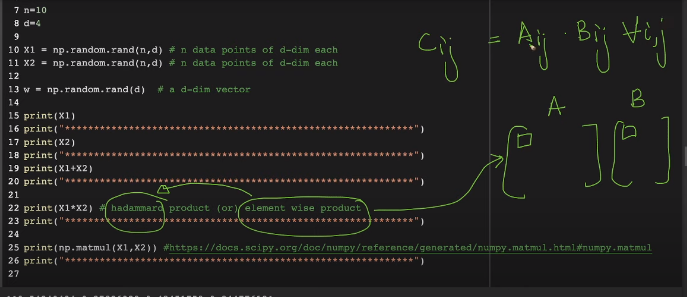

### 2.3 Matrix multiplication 

In [65]:
# numpy.matmul -> https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html

print("Matrix multiplication X1_T*X2\n", np.matmul(X1, X2))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

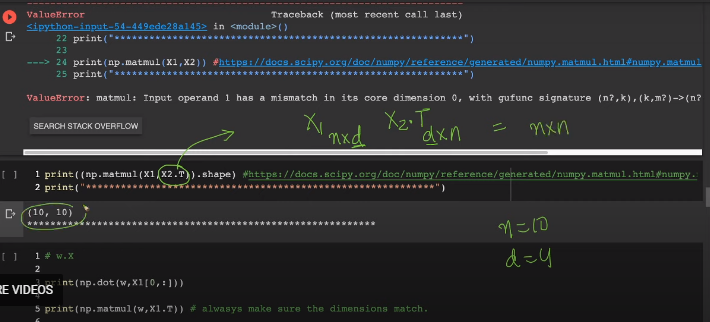

In [71]:
# after taking transpose now the matrix multiplication is compatible 
print("X1(n x d), X2.T(d x n) \n", np.matmul(X1,X2.T))
print((np.matmul(X1, X2.T)).shape)

X1(n x d), X2.T(d x n) 
 [[0.41476256 1.20091267 0.9311423  1.41512829 0.84315978 0.80403734]
 [0.25843516 0.90593644 0.80674383 1.08568449 0.48726439 0.79012859]
 [0.29627141 0.77762478 0.45281541 1.08302275 0.98680107 1.07993187]
 [0.32119507 0.87157387 0.94027231 0.94850888 0.35373131 0.51226409]
 [0.28030937 1.30272656 0.42482944 1.69150261 1.19152854 0.96060852]
 [0.51569339 1.0504208  0.73353352 1.40187272 1.39553602 1.31581758]]
(6, 6)


In [72]:
# w.X

print(np.dot(w,X1[0,:]))

print(np.matmul(w, X1.T)) # alwasys make sure the dimensions match.

print(np.matmul(X1, w.T))

print(np.matmul(w, X1))

1.5540481780397601
[1.55404818 1.48971727 1.58344843 1.22550943 1.41695788 2.01932239]
[1.55404818 1.48971727 1.58344843 1.22550943 1.41695788 2.01932239]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

### 2.4 Froebnius norm 

This is analogus to L2 norm of a vector 

In [73]:
# Forebnius norm: 
Image(url = "https://i.imgur.com/hNSMzzE.png", width = 300)

In [8]:
# building formula from scratch
np.random.seed(42)
X = np.random.rand(6, 4)

sum = 0
rows  = X.shape[0]
columns = X.shape[1]
for i in range(rows): 
    for j in range(columns):
        sum += X[i, j]**2

f_norm = math.sqrt(sum)
print(f_norm)

2.5694304141613853


In [10]:
# Using the numpy linalg -> https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
print(np.linalg.norm(X, 'fro'))

2.5694304141613857


> Note: Use np.linalg.norm(X, 'fro') for faster implementation as it is faster(C/C++) and better optimized. 

### 2.5 Determinant of a matrix

In [96]:
matrix1 = np.matrix([[8,2],[4,6]])
print(type(matrix1))
print(matrix1)

print(np.linalg.det(matrix1))
print(round(np.linalg.det(matrix1)))

<class 'numpy.matrix'>
[[8 2]
 [4 6]]
39.99999999999998
40.0


In [99]:
X = np.random.rand(5, 3) # This is an array (but behaves like a matrix)
print(type(X))
print(X)
print("This is an array\n")

Y = np.matrix(np.random.rand(5, 3)) # This is an actual matrix (you can skip np.matrix part, still it works fine)
print(type(Y))
print(Y)
print("This is a matrix\n")

<class 'numpy.ndarray'>
[[0.58184219 0.02043913 0.21002658]
 [0.54468488 0.76911517 0.25069523]
 [0.28589569 0.85239509 0.97500649]
 [0.88485329 0.35950784 0.59885895]
 [0.35479561 0.34019022 0.17808099]]
This is an array

<class 'numpy.matrix'>
[[0.23769421 0.04486228 0.50543143]
 [0.37625245 0.5928054  0.62994188]
 [0.14260031 0.9338413  0.94637988]
 [0.60229666 0.38776628 0.363188  ]
 [0.20434528 0.27676506 0.24653588]]
This is a matrix



In [105]:
# determinant of a square matrix
Z = np.random.rand(2, 2) 
print(Z)
np.linalg.det(Z)

[[0.25425752 0.64110126]
 [0.20012361 0.65762481]]


0.03890655422571589

In [106]:
# determinant of a non-square matrix
non_square_mat = np.random.rand(3, 2) 
print(non_square_mat)
np.linalg.det(non_square_mat)

[[0.77828922 0.7795984 ]
 [0.61032815 0.30900035]
 [0.69773491 0.8596183 ]]


LinAlgError: Last 2 dimensions of the array must be square

> Note: np.linalg.det(X) raises error if the matrix X is not a square matrix.

### 2.6 Inverse of a square matrix 

In [107]:
# to find inverse of a square matrix 

np.linalg.inv(Z)

array([[ 16.90267408, -16.47797579],
       [ -5.14369908,   6.53508189]])

> Note: If the matrix given in argument is not square the inversion fails.

### 2.7 Covariance of a matrix

> Before we start this, remember - All vectors are column vectors by default. 

In [107]:
# Reference -> https://datatofish.com/covariance-matrix-python/

A = [45,37,42,35,39]
B = [38,31,26,28,33]
C = [10,15,17,21,12]

data = np.array([A,B,C])
print(data)
print("While displaying it shows as 3 x 5 atrix, but while computing covariance it actually treats them as columns")
print("- "*15)
covMatrix = np.cov(data)
print(covMatrix)
print("Thus we have obtained a 3 x 3 covariance matrix for 5 rows and 3 columns of data (i.e. 5 x 3 actually)")

[[45 37 42 35 39]
 [38 31 26 28 33]
 [10 15 17 21 12]]
While displaying it shows as 3 x 5 atrix, but while computing covariance it actually treats them as columns
- - - - - - - - - - - - - - - 
[[ 15.8    9.6  -12.  ]
 [  9.6   21.7  -17.25]
 [-12.   -17.25  18.5 ]]
Thus we have obtained a 3 x 3 covariance matrix for 5 rows and 3 columns of data (i.e. 5 x 3 actually)


In [73]:
# let's demonstrate this using Pandas to get a clear picture of previous example 
import pandas as pd

data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

df = pd.DataFrame(data)
print(df)
print("- "*10)
covMatrix = pd.DataFrame.cov(df)
print(covMatrix)

    A   B   C
0  45  38  10
1  37  31  15
2  42  26  17
3  35  28  21
4  39  33  12
- - - - - - - - - - 
      A      B      C
A  15.8   9.60 -12.00
B   9.6  21.70 -17.25
C -12.0 -17.25  18.50


In [106]:
# Let's do this using conventional approach

f1 = [45,37,42,35,39] # feature1
f2 = [38,31,26,28,33] # feature2
f3 = [10,15,17,21,12] # feature3
X = np.array([f1, f2, f3])
print("The way numpy displays matrix, internally it displays columns as rows and rows as columns")
print(X)
print("- "*20)
print("So we correct it as how we would like it by taking a transpose of it - ")
Y = X.T
print(Y)
print("- "*20)
print("Next we do mean centring columnwise and find the covarince matrix by matrix multiplication")
Y = Y - Y.mean(0)
n, d = Y.shape
covMatrix = np.matmul(Y.T, Y)/(n - 1)
print(covMatrix)
print("- "*15)
print("Let'see if this matches the one we find using np.cov")
np.cov(X)

The way numpy displays matrix, internally it displays columns as rows and rows as columns
[[45 37 42 35 39]
 [38 31 26 28 33]
 [10 15 17 21 12]]
- - - - - - - - - - - - - - - - - - - - 
So we correct it as how we would like it by taking a transpose of it - 
[[45 38 10]
 [37 31 15]
 [42 26 17]
 [35 28 21]
 [39 33 12]]
- - - - - - - - - - - - - - - - - - - - 
Next we do mean centring columnwise and find the covarince matrix by matrix multiplication
[[ 15.8    9.6  -12.  ]
 [  9.6   21.7  -17.25]
 [-12.   -17.25  18.5 ]]
- - - - - - - - - - - - - - - 
Let'see if this matches the one we find using np.cov


array([[ 15.8 ,   9.6 , -12.  ],
       [  9.6 ,  21.7 , -17.25],
       [-12.  , -17.25,  18.5 ]])

> Perfect ! 

In [155]:
'''
p = np.ones((3, 2))
print(p)
print(" ")
print(np.cov(p))
k = pd.DataFrame(p, columns = ['A', 'B'])
k.cov()
'''

[[1. 1.]
 [1. 1.]
 [1. 1.]]
 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


,A,B
A,0.0,0.0
B,0.0,0.0


## 3. Convolution basics

* Used in Deep-learning and Computer-Vision a lot

* Image: Matrix of pixel values

In [113]:
# Convolution: Google Image search ---> Apple's developer blog.

Image(url= "https://docs-assets.developer.apple.com/published/09348c5368/a55b1477-4f79-4221-8aa1-ab3ae9f01f89.png", width=400)

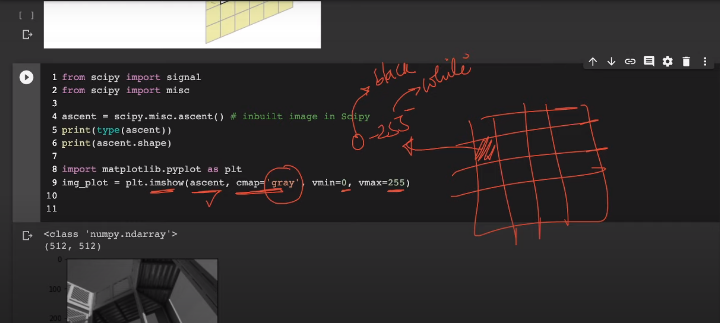

<class 'numpy.ndarray'>
(512, 512)


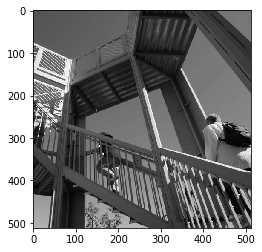

In [138]:
# loading an in-built image as a 2D array

import scipy
from scipy import signal
from scipy import misc

ascent = scipy.misc.ascent() # inbuilt image in Scipy
print(type(ascent))
print(ascent.shape)

import matplotlib.pyplot as plt
img_plot = plt.imshow(ascent, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


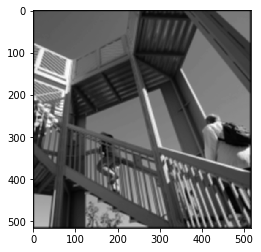

In [132]:
k = 5
kernel = np.ones((k,k))
kernel /= np.sum(kernel)
print(kernel)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
blurred = signal.convolve2d(ascent, kernel) 
plt.imshow(blurred , cmap = 'gray')
plt.show()

[[0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 

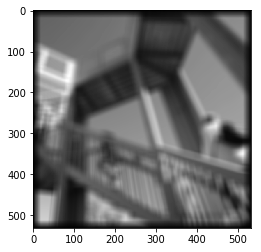

In [133]:
k = 20
kernel = np.ones((k,k))
kernel /= np.sum(kernel)
print(kernel)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
blurred = signal.convolve2d(ascent, kernel) 
plt.imshow(blurred , cmap='gray')
plt.show()

## 4. Hypersphere

- Simple extension to a Circle to d-dim space

- Representation

- Inside/Outside

- Distance from point to Hyper-Sphere

In [139]:
Image(url= "https://i.imgur.com/6ub3S4v.png", width=500)

### 4.1. Hyperspehers as extension of 2D Circles

In [149]:
# Representation:
np.random.seed(100)

c = np.random.rand(10)
r = 10
#print(c)
#print(r)
circle = (c, r)
print("Circle:", circle)

Circle: (array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886,
       0.12156912, 0.67074908, 0.82585276, 0.13670659, 0.57509333]), 10)


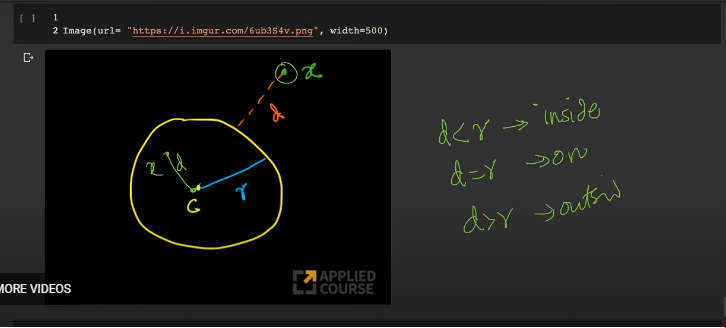

### 4.2 Distance of a point from Center

In [151]:
# This point x1 is on the center, so we can expect it's dist from centre to be 0
x1 = c + np.zeros(10)
d_x1_c = np.linalg.norm(x1-c)
print("Distance of point x1 from the center", d_x1_c)

# This point x2 is outside the circle
x2 = c + r + (np.ones(10)*0.1) ;
d_x2_c = np.linalg.norm(x2-c)
print("Distance of point x1 from the center", d_x2_c)

Distance of point x1 from the center 0.0
Distance of point x1 from the center 31.93900436770063


### 4.3 Shortest distance of a point from a hypersphere

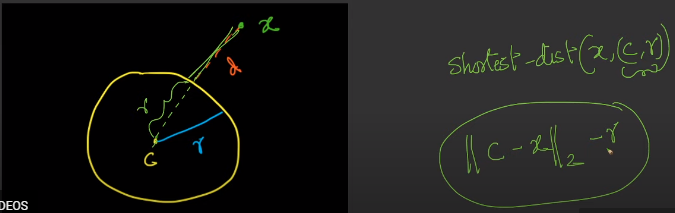

In [153]:
# distance from a point to hyper-sphere
x2 = c + r + (np.ones(10)*0.1) ;
d_x2 = np.linalg.norm(x2-c) - r 
print(d_x2)

21.93900436770063


### Future Sessions:

  - Data Matrix operations
  - PCA, SVD, NMF
  - Linear Optimization
  